In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('ufc-fighters-statistics.csv')

In [3]:
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [4]:
df.info()
# ALL VALUES PRESENT FOR FOLLOWING COLUMNS:
# name, wins, losses, draws, significant_strikes_landed_per_minute
# significant_striking_accuracy, significant_strikes_absorbed_per_minute
# significant_strike_defence, average_takedowns_landed_per_15_minutes
# takedown_accuracy, takedown_defense, average_submissions_attempted_per_15_minutes

# Missing values in following columns:
# date_of_birth, stance, reach_in_cm, weight_in_kg, height_cm, nickname

# think I'll drop date of birth as well as nickname. 
# reach, weight, height, I can get average values for the weightclass.

# stance i can't really guess what it is. If a fighter doesn't have stance data
# they are likely not very well known, I will probably just discard all data entries 
# with missing stance 
#(after a quick scroll through the data i cannot recognise any fighters without stance - they are no-names)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


In [5]:
# nickname is a pointless column, its getting dropped
# I'll keep name so i can come back to the fighters if theres data i need to impute
# date of birth has limited usefulness, so im cutting it out
df.drop(columns=['nickname'], inplace=True)
df.drop(columns=['date_of_birth'], inplace=True)

# dropping irrelevant fighters who's stance is unknown
df.dropna(subset=['stance'], inplace=True)
df

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,7,0,0,190.50,92.99,NaN,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
5,Gerald Strebendt,9,7,0,175.26,70.31,NaN,Orthodox,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4
7,Kenneth Seegrist,4,7,0,182.88,83.91,NaN,Orthodox,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4
8,Will Kerr,9,3,0,177.80,70.31,175.26,Orthodox,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,0,1,0,175.26,106.59,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,1,1,2,172.72,70.31,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,12,20,1,180.34,77.11,NaN,Orthodox,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,6,1,0,190.50,83.91,210.82,Southpaw,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [6]:
# At this point I realized this data also contains female fighters, and I can't really compare female and
# male fighters. Googling each fighters name and then assigning them a sex would take forever, a quicker fix is
# to get rid of all female fighters along with some male fighters in the lighter weight classes.

# Women's weight classes go up to a maximum of Featherweight, which has a max limit of 65.8 kg. I think
# if i just cut all fighters below 65.8 it should get rid of women altogether
df = df[df['weight_in_kg'] >= 65.8]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2188 non-null   object 
 1   wins                                          2188 non-null   int64  
 2   losses                                        2188 non-null   int64  
 3   draws                                         2188 non-null   int64  
 4   height_cm                                     2168 non-null   float64
 5   weight_in_kg                                  2188 non-null   float64
 6   reach_in_cm                                   1259 non-null   float64
 7   stance                                        2188 non-null   object 
 8   significant_strikes_landed_per_minute         2188 non-null   float64
 9   significant_striking_accuracy                 2188 non-null   float6

In [7]:
# Reach and height are the only columns left with some missing data, these ones 
# I can substitute averages for, but first I must create a "Weightclass" feature

weight_classes = ["lightweight", "welterweight", "middleweight", "light-heavyweight"]
for weight_class in weight_classes:
    df[weight_class] = 0

for index, row in df.iterrows():
    weight = row['weight_in_kg']
    if 65.8 < weight < 70.3:
        df.at[index, 'lightweight'] = 1
    elif 70.3 < weight < 77.1:
        df.at[index, 'welterweight'] = 1
    elif 77.1 < weight < 83.9:
        df.at[index, 'middleweight'] = 1
    elif 83.9 < weight < 93:
        df.at[index, 'light-heavyweight'] = 1

df

C:\Users\nfeda\AppData\Local\Temp\ipykernel_25548\897970042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[weight_class] = 0
C:\Users\nfeda\AppData\Local\Temp\ipykernel_25548\897970042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[weight_class] = 0
C:\Users\nfeda\AppData\Local\Temp\ipykernel_25548\897970042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,lightweight,welterweight,middleweight,light-heavyweight
0,Robert Drysdale,7,0,0,190.50,92.99,NaN,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,0,0,0,1
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,0,0,0,1
5,Gerald Strebendt,9,7,0,175.26,70.31,NaN,Orthodox,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,0,1,0,0
7,Kenneth Seegrist,4,7,0,182.88,83.91,NaN,Orthodox,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4,0,0,0,1
8,Will Kerr,9,3,0,177.80,70.31,175.26,Orthodox,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,Amaury Bitetti,5,2,0,175.26,83.91,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,1
4106,John Campetella,0,1,0,175.26,106.59,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0
4107,Andre Pederneiras,1,1,2,172.72,70.31,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,1,0,0
4108,Bryson Kamaka,12,20,1,180.34,77.11,NaN,Orthodox,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0,0,0,1,0


In [8]:
lightweight_df = df[df['lightweight'] == 1]
#lightweight_df.to_csv('lightweight_df.csv')

# after analysing this, there is no reach data at all
# I found online that there is a strong enough correlation between reach and height
# for these lightweights I will simply set their reaches to be their heights


clean_lightweight_df = lightweight_df.dropna(subset=['height_cm'])

average_height_lightweight_cm = clean_lightweight_df['height_cm'].mean()

print("Average height (cm) of lightweight fighters (excluding null values):", average_height_lightweight_cm)

Average height (cm) of lightweight fighters (excluding null values): 173.92315789473685


In [9]:
welterweight_df = df[df['welterweight'] == 1]
#welterweight_df.to_csv('welterweight_df.csv')
clean_welterweight_df = welterweight_df.dropna(subset=['height_cm', 'reach_in_cm'])

average_height_welterweight_cm = clean_welterweight_df['height_cm'].mean()
average_reach_welterweight_in_cm = clean_welterweight_df['reach_in_cm'].mean()

print("Average height (cm) of welterweight fighters (excluding null values):", average_height_welterweight_cm)
print("Average reach (cm) of welterweight fighters (excluding null values):", average_reach_welterweight_in_cm)

Average height (cm) of welterweight fighters (excluding null values): 177.6663157894737
Average reach (cm) of welterweight fighters (excluding null values): 181.76127423822717


In [10]:
middleweight_df = df[df['middleweight'] == 1]
#middleweight_df.to_csv('middleweight_df.csv')
clean_middleweight_df = middleweight_df.dropna(subset=['height_cm', 'reach_in_cm'])

average_height_middleweight_cm = clean_middleweight_df['height_cm'].mean()
average_reach_middleweight_in_cm = clean_middleweight_df['reach_in_cm'].mean()

print("Average height (cm) of middleweight fighters (excluding null values):", average_height_middleweight_cm)
print("Average reach (cm) of middleweight fighters (excluding null values):", average_reach_middleweight_in_cm)

Average height (cm) of middleweight fighters (excluding null values): 181.57921212121212
Average reach (cm) of middleweight fighters (excluding null values): 186.75927272727273


In [11]:
lhw_df = df[df['light-heavyweight'] == 1]
#lhw_df.to_csv('lhw_df.csv')
clean_lhw_df = lhw_df.dropna(subset=['height_cm', 'reach_in_cm'])

average_height_lhw_cm = clean_lhw_df['height_cm'].mean()
average_reach_lhw_in_cm = clean_lhw_df['reach_in_cm'].mean()

print("Average height (cm) of light-heavyweight fighters (excluding null values):", average_height_lhw_cm)
print("Average reach (cm) of light-heavyweight fighters (excluding null values):", average_reach_lhw_in_cm)

Average height (cm) of light-heavyweight fighters (excluding null values): 186.08874396135266
Average reach (cm) of light-heavyweight fighters (excluding null values): 191.36507246376812


In [12]:
hw_df = df[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0)]
#hw_df.to_csv('hw_df.csv')
clean_hw_df = hw_df.dropna(subset=['height_cm', 'reach_in_cm'])

average_height_hw_cm = clean_hw_df['height_cm'].mean()
average_reach_hw_in_cm = clean_hw_df['reach_in_cm'].mean()

print("Average height (cm) of heavyweight fighters (excluding null values):", average_height_hw_cm)
print("Average reach (cm) of heavyweight fighters (excluding null values):", average_reach_hw_in_cm)

Average height (cm) of heavyweight fighters (excluding null values): 189.736339869281
Average reach (cm) of heavyweight fighters (excluding null values): 195.66300653594772


In [13]:
# Now that I know average values I can substitute in height and reach values if they are null
# For the lightweight reach values I will make them the fighters height*1.02
# It seems on average fighter reach lengths are slightly longer than their heights
# The larger the fighter, the larger the effect
# HeavyWeights reach/height =>  (195.66/189.73) - 1 = 3.125...%
# Welterweight reach/height => (181.76/177.66) - 1 = 2.307...%
# As lightweight is a step lighter than welterweight, i'll make the additional % to be 2 for convenience

df.loc[(df['lightweight'] == 1) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = df['height_cm']*1.02

df.loc[(df['welterweight'] == 1) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = average_reach_welterweight_in_cm
df.loc[(df['welterweight'] == 1) & df['height_cm'].isnull(), 'height_cm'] = average_height_welterweight_cm

df.loc[(df['middleweight'] == 1) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = average_reach_middleweight_in_cm
df.loc[(df['middleweight'] == 1) & df['height_cm'].isnull(), 'height_cm'] = average_height_middleweight_cm

df.loc[(df['light-heavyweight'] == 1) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = average_reach_lhw_in_cm
df.loc[(df['light-heavyweight'] == 1) & df['height_cm'].isnull(), 'height_cm'] = average_height_lhw_cm

df.loc[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = average_reach_lhw_in_cm
df.loc[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0) & df['height_cm'].isnull(), 'height_cm'] = average_height_lhw_cm


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 0 to 4109
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2188 non-null   object 
 1   wins                                          2188 non-null   int64  
 2   losses                                        2188 non-null   int64  
 3   draws                                         2188 non-null   int64  
 4   height_cm                                     2188 non-null   float64
 5   weight_in_kg                                  2188 non-null   float64
 6   reach_in_cm                                   2188 non-null   float64
 7   stance                                        2188 non-null   object 
 8   significant_strikes_landed_per_minute         2188 non-null   float64
 9   significant_striking_accuracy                 2188 non-null   float6

In [15]:
# Imputation of missing data complete
df

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,lightweight,welterweight,middleweight,light-heavyweight
0,Robert Drysdale,7,0,0,190.50,92.99,191.365072,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,0,0,0,1
4,Collin Huckbody,8,2,0,190.50,83.91,193.040000,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,0,0,0,1
5,Gerald Strebendt,9,7,0,175.26,70.31,181.761274,Orthodox,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,0,1,0,0
7,Kenneth Seegrist,4,7,0,182.88,83.91,191.365072,Orthodox,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4,0,0,0,1
8,Will Kerr,9,3,0,177.80,70.31,175.260000,Orthodox,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,Amaury Bitetti,5,2,0,175.26,83.91,191.365072,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,1
4106,John Campetella,0,1,0,175.26,106.59,191.365072,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0
4107,Andre Pederneiras,1,1,2,172.72,70.31,181.761274,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,1,0,0
4108,Bryson Kamaka,12,20,1,180.34,77.11,186.759273,Orthodox,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0,0,0,1,0


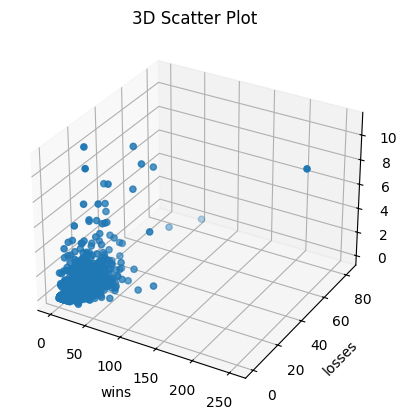

In [16]:
# I would like to perform multiple regression to figure out if any of my variable can decently explain a fighter's outcomes. Currently
# I have access to a fighter's wins, losses, and draws. Wins and Losses together can be used to desccribe a fighters outcomes by
# creating a Win:Loss ratio. What I would like to understand first though, is how important are draws? Can i toss it out or is it
# reasonably important and should be combined with the Win:Loss ratio in some way?

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
x = df['wins']
y = df['losses']
z = df['draws']

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('wins')
ax.set_ylabel('losses')
ax.set_zlabel('draws')
ax.set_title('3D Scatter Plot')

plt.show()

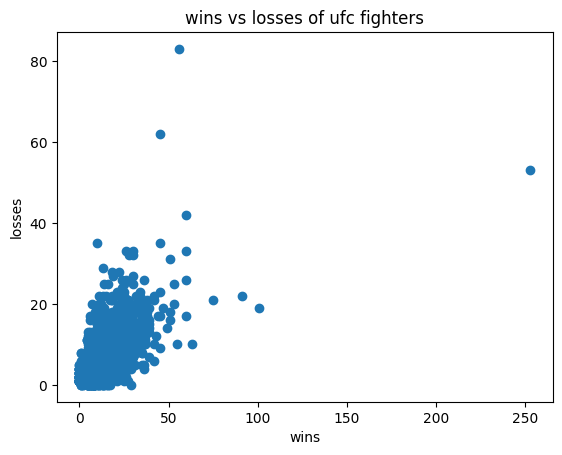

In [17]:
# Sample data
x = df['wins']
y = df['losses']

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('wins')
plt.ylabel('losses')
plt.title('wins vs losses of ufc fighters')

# Show the plot
plt.show()

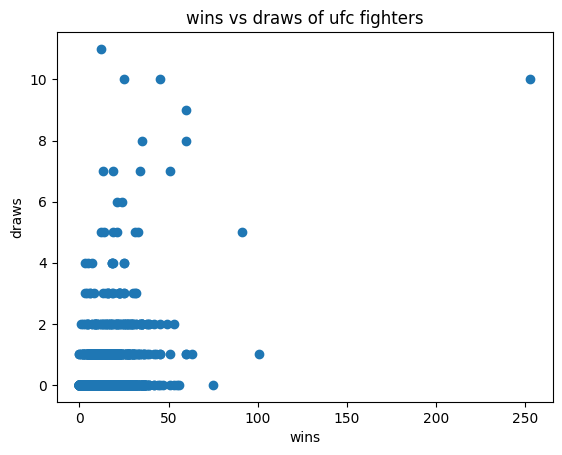

In [18]:
# Sample data
x = df['wins']
y = df['draws']

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('wins')
plt.ylabel('draws')
plt.title('wins vs draws of ufc fighters')

# Show the plot
plt.show()

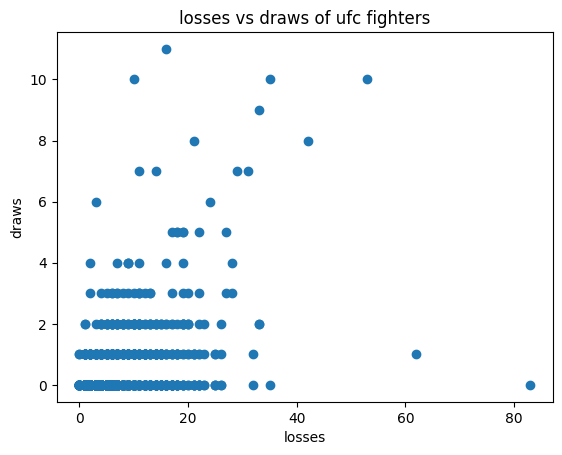

In [19]:
# Sample data
x = df['losses']
y = df['draws']

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('losses')
plt.ylabel('draws')
plt.title('losses vs draws of ufc fighters')

# Show the plot
plt.show()

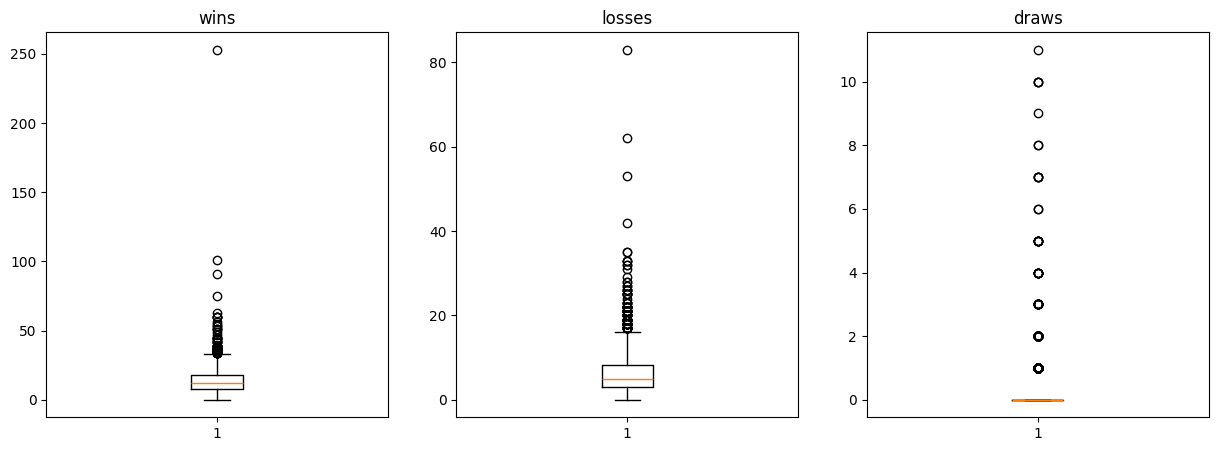

In [20]:
x = df['wins']
y = df['losses']
z = df['draws']

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Box and whisker plot for x
axs[0].boxplot(x)
axs[0].set_title('wins')

# Box and whisker plot for y
axs[1].boxplot(y)
axs[1].set_title('losses')

# Box and whisker plot for z
axs[2].boxplot(z)
axs[2].set_title('draws')

plt.show()

In [21]:
# Judging by the axes in the scatterplots, fighters tend to have more wins than draws, as well as more losses than draws. This tells us that draws happen
# but the result of a fight would usually be either a win or a loss. from box and whisker plot, it appears that any amount of draws on a fighter's
# record makes that fighter an outlier. Lastly, I believe a draw doesn't devalue a fighter the way a loss does. All fights i've seen which
# were ruled by the judges to be a draw were done so because both fighters put on a fantastic show and were on par with one another.
# The only exception i've seen to this is when fighter A is slightly better than fighter B, but since the fight happens on fighter B's turf
# The judges rule the fight as a draw rather than aqknowledging that fighter A was slightly better. my dataset doesn't capture this however.
# I think opting for a simple Win:Loss ratio would be better than mixing draws into the equation, 

In [22]:
df['wins_to_losses_ratio'] = df['wins'] / df['losses']
df = df.replace([np.inf, -np.inf], np.nan)
df.drop('draws', axis=1, inplace=True)
df = df.dropna()


C:\Users\nfeda\AppData\Local\Temp\ipykernel_25548\1962801154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wins_to_losses_ratio'] = df['wins'] / df['losses']


In [23]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2138 entries, 4 to 4109
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2138 non-null   object 
 1   wins                                          2138 non-null   int64  
 2   losses                                        2138 non-null   int64  
 3   height_cm                                     2138 non-null   float64
 4   weight_in_kg                                  2138 non-null   float64
 5   reach_in_cm                                   2138 non-null   float64
 6   stance                                        2138 non-null   object 
 7   significant_strikes_landed_per_minute         2138 non-null   float64
 8   significant_striking_accuracy                 2138 non-null   float64
 9   significant_strikes_absorbed_per_minute       2138 non-null   float6

,name,wins,losses,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,lightweight,welterweight,middleweight,light-heavyweight,wins_to_losses_ratio
4,Collin Huckbody,8,2,190.50,83.91,193.040000,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,0,0,0,1,4.000000
5,Gerald Strebendt,9,7,175.26,70.31,181.761274,Orthodox,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,0,1,0,0,1.285714
7,Kenneth Seegrist,4,7,182.88,83.91,191.365072,Orthodox,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4,0,0,0,1,0.571429
8,Will Kerr,9,3,177.80,70.31,175.260000,Orthodox,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3,0,1,0,0,3.000000
9,Neil Grove,12,8,198.12,120.20,191.365072,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3,0,0,0,0,1.500000


In [24]:
df.nunique()

name                                            2138
wins                                              56
losses                                            37
height_cm                                         27
weight_in_kg                                      93
reach_in_cm                                       30
stance                                             5
significant_strikes_landed_per_minute            591
significant_striking_accuracy                     80
significant_strikes_absorbed_per_minute          679
significant_strike_defence                        81
average_takedowns_landed_per_15_minutes          462
takedown_accuracy                                 80
takedown_defense                                  86
average_submissions_attempted_per_15_minutes      74
lightweight                                        2
welterweight                                       2
middleweight                                       2
light-heavyweight                             

In [26]:
#Stance having 5 values is odd - need to investigate
df['stance'].unique()


array(['Orthodox', 'Southpaw', 'Switch', 'Sideways', 'Open Stance'],
      dtype=object)

In [27]:
# Turns out "Sideways" & "Open Stance" exist, didn't know that...
# The fact there are no recurring fighters as shown by the data having 2138 unique names for 2138 rows is good

df.to_csv('fighters_cleaned.csv', index=False)